In [1]:
#clone yolov5 algorithm from the official git repository
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15093, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15093 (delta 0), reused 3 (delta 0), pack-reused 15088
Receiving objects: 100% (15093/15093), 13.63 MiB | 18.05 MiB/s, done.
Resolving deltas: 100% (10436/10436), done.
Checking out files: 100% (143/143), done.


In [2]:
#install all the requirements that are required to run the algorithm
!pip install -r yolov5/requirements.txt

Looking in indexes: http://pip-notebook.modelarts.com:8888/repository/pypi/simple/

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
#get the pretrained model from the official github page
!wget "https://github.com/ultralytics/yolov5/releases/download/v6.1/yolov5l.pt"

In [3]:
#checking the dataset yaml file
!cat dataset.yaml

train: ../dataset_masks/train/
val: ../dataset_masks/eval/

nc: 2
names: ['no_mask', 'yes_mask']

In [4]:
#updating dependency so that all the dependencies match between the yolo and huawei cloud
!pip3 install --upgrade requests

Looking in indexes: http://pip-notebook.modelarts.com:8888/repository/pypi/simple/

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [16]:
#train data
!python3 yolov5/train.py --img 640 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5l.pt

train: weights=yolov5l.pt, cfg=, data=dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.7.10 torch-1.8.0 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_ga

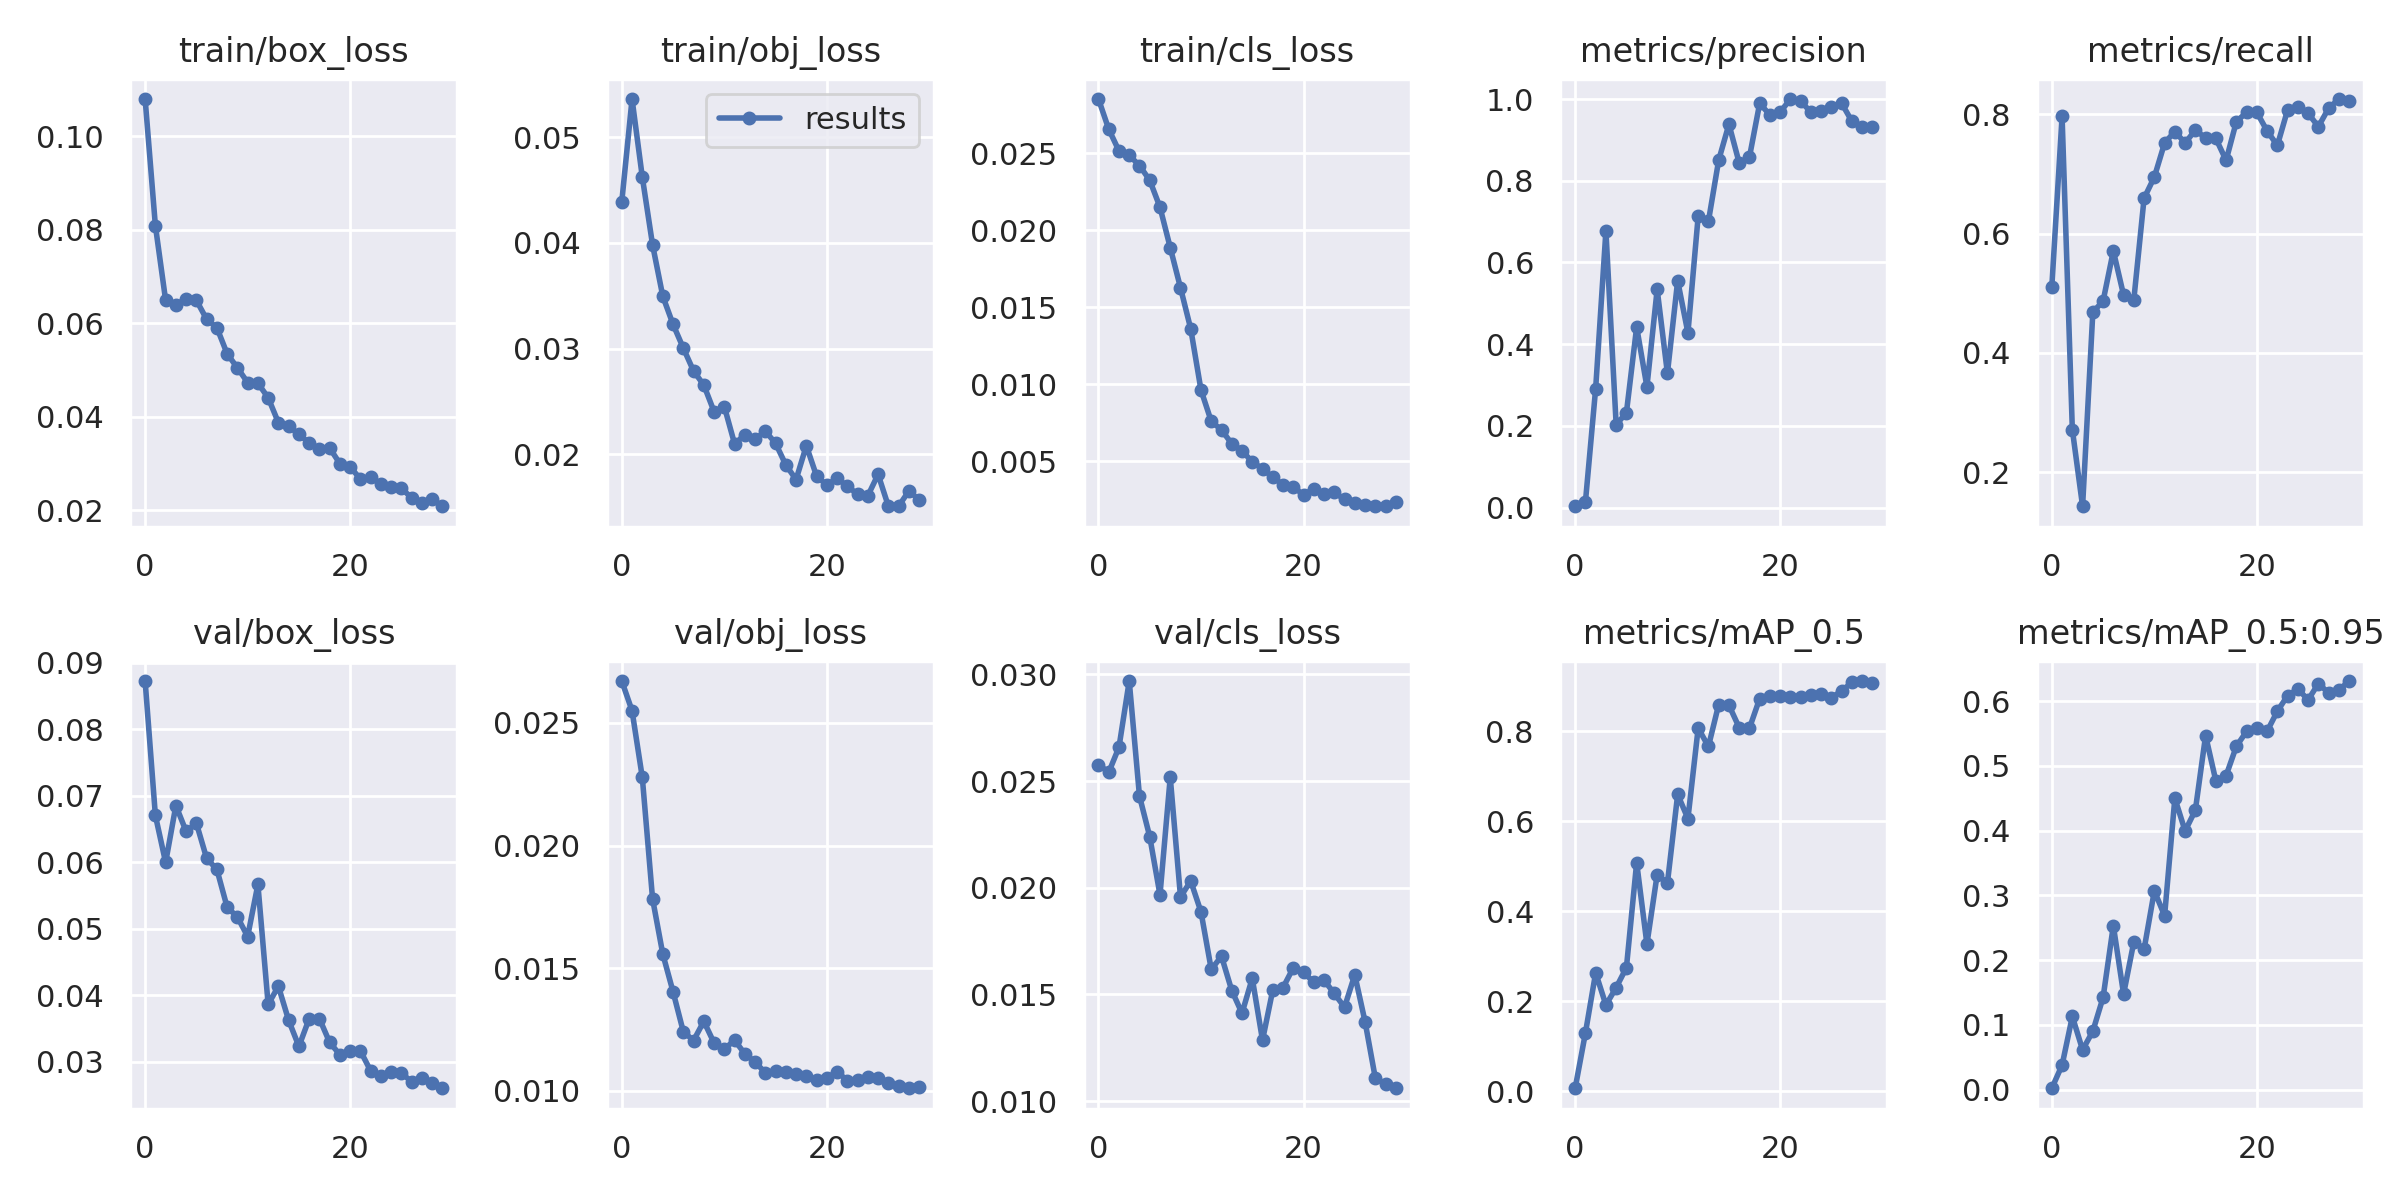

In [17]:
#show results
from IPython.display import Image
Image(filename='yolov5/runs/train/exp2/results.png')

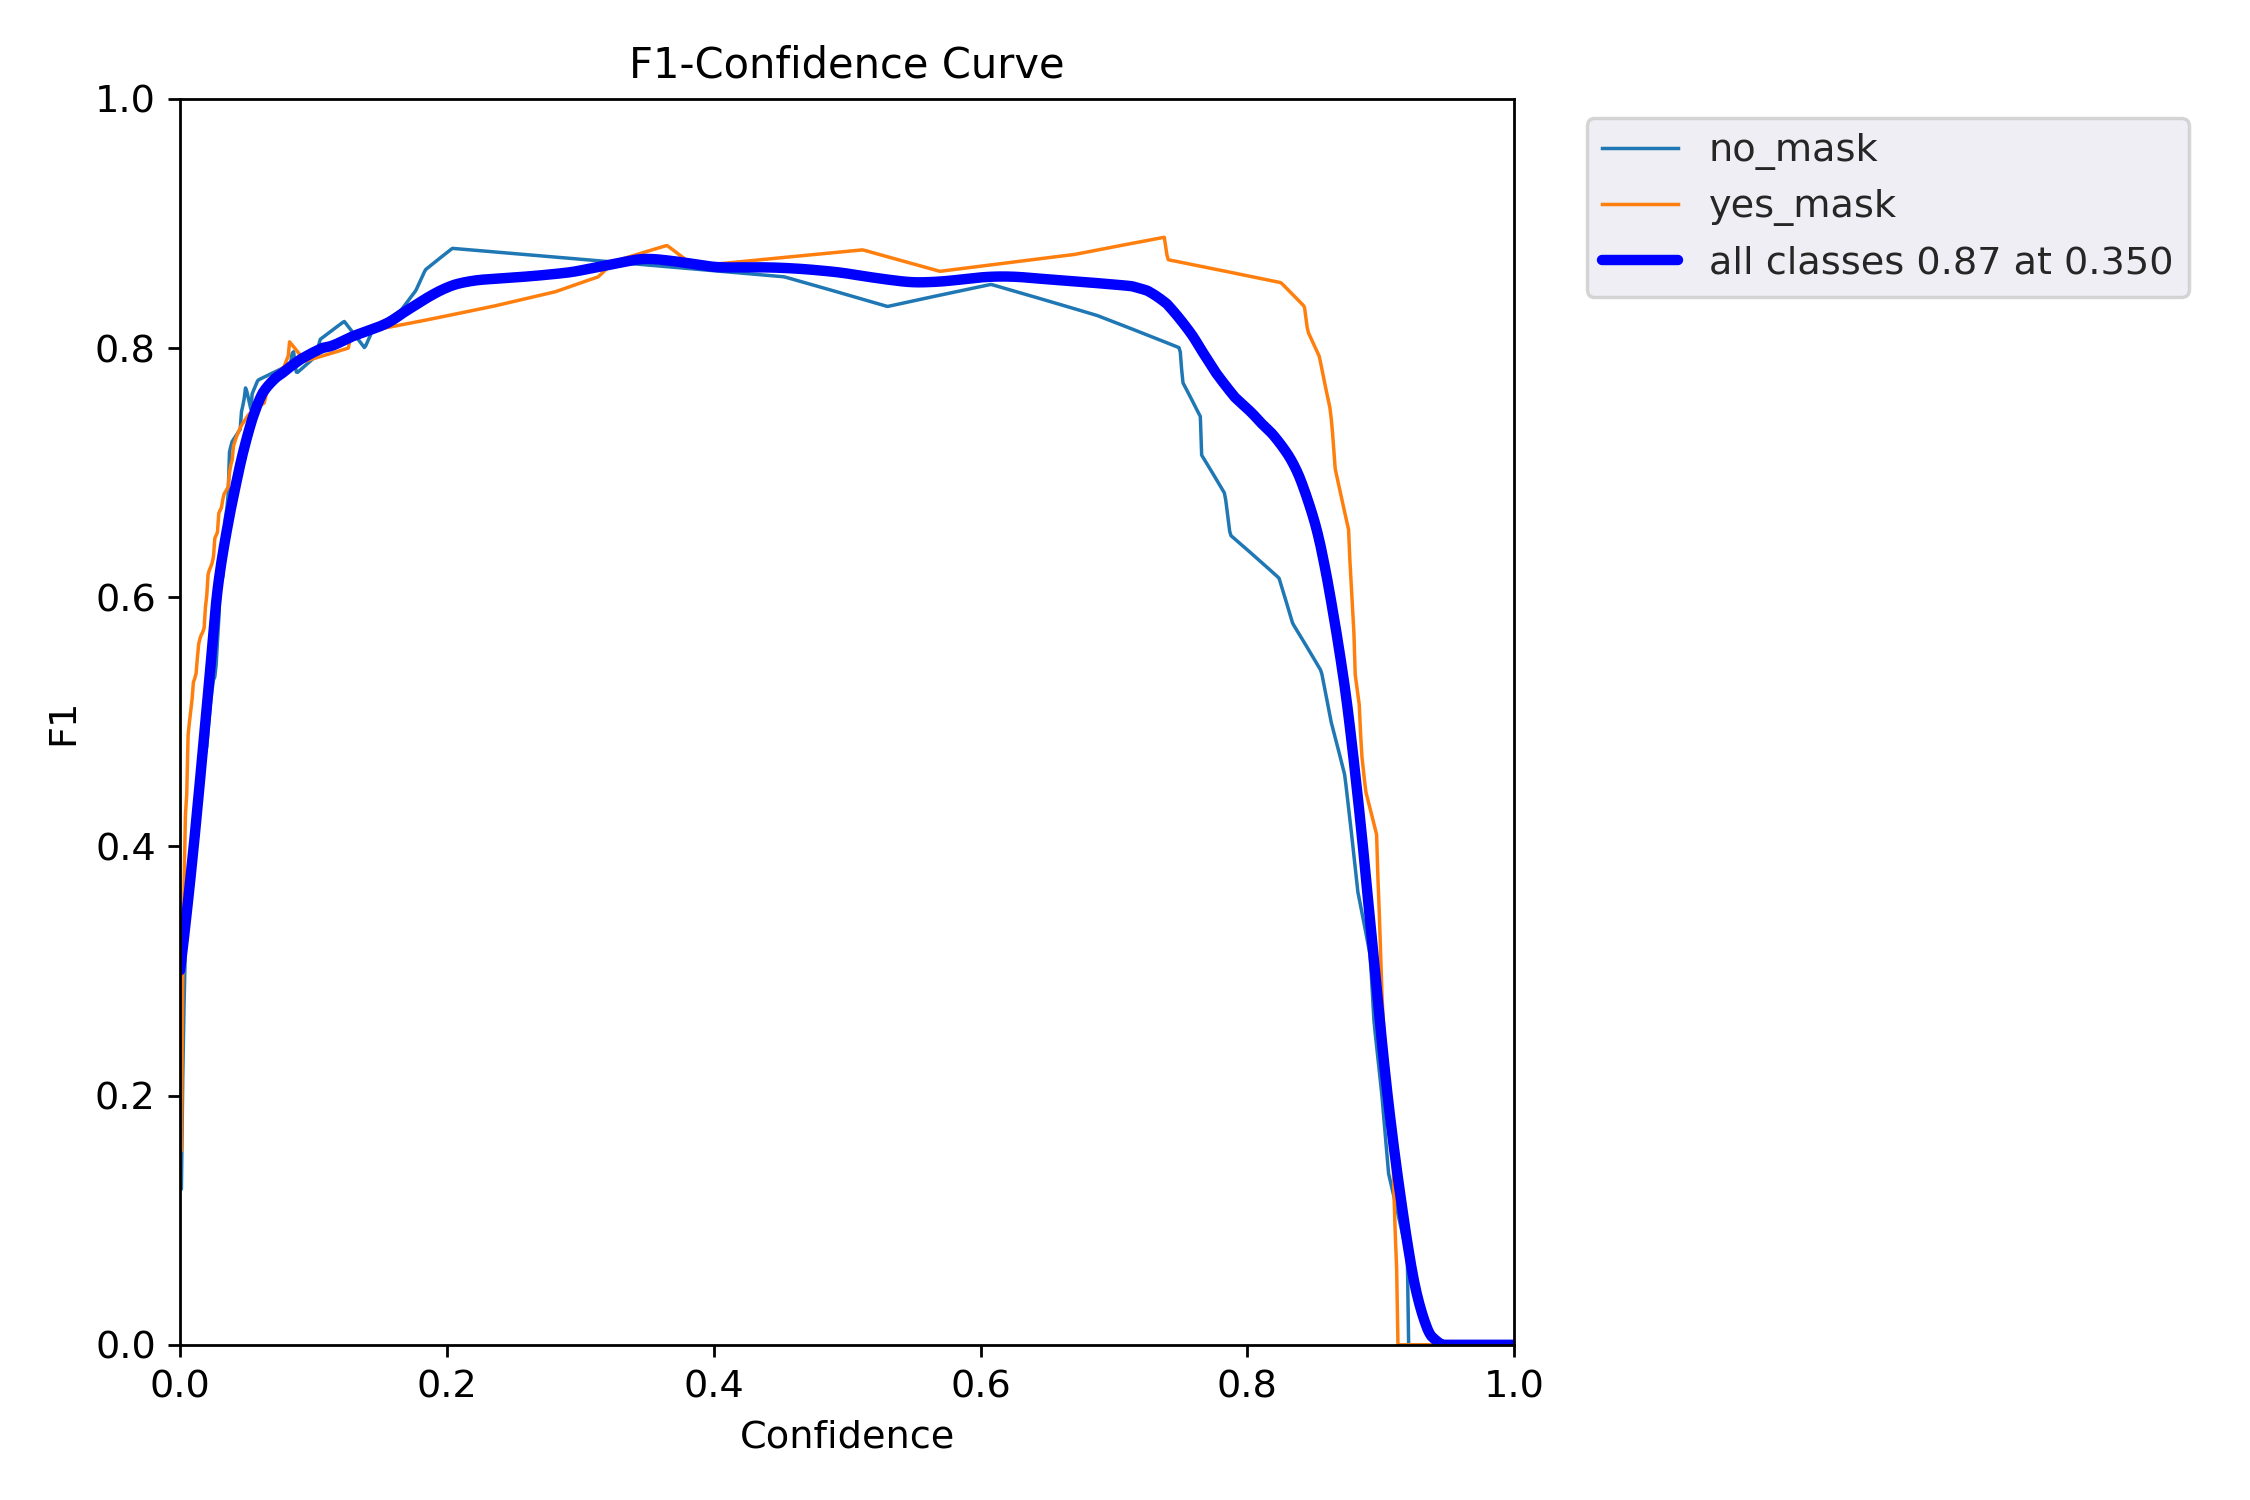

In [18]:
#show confidence curve
from IPython.display import Image
Image(filename='yolov5/runs/train/exp2/F1_curve.png')

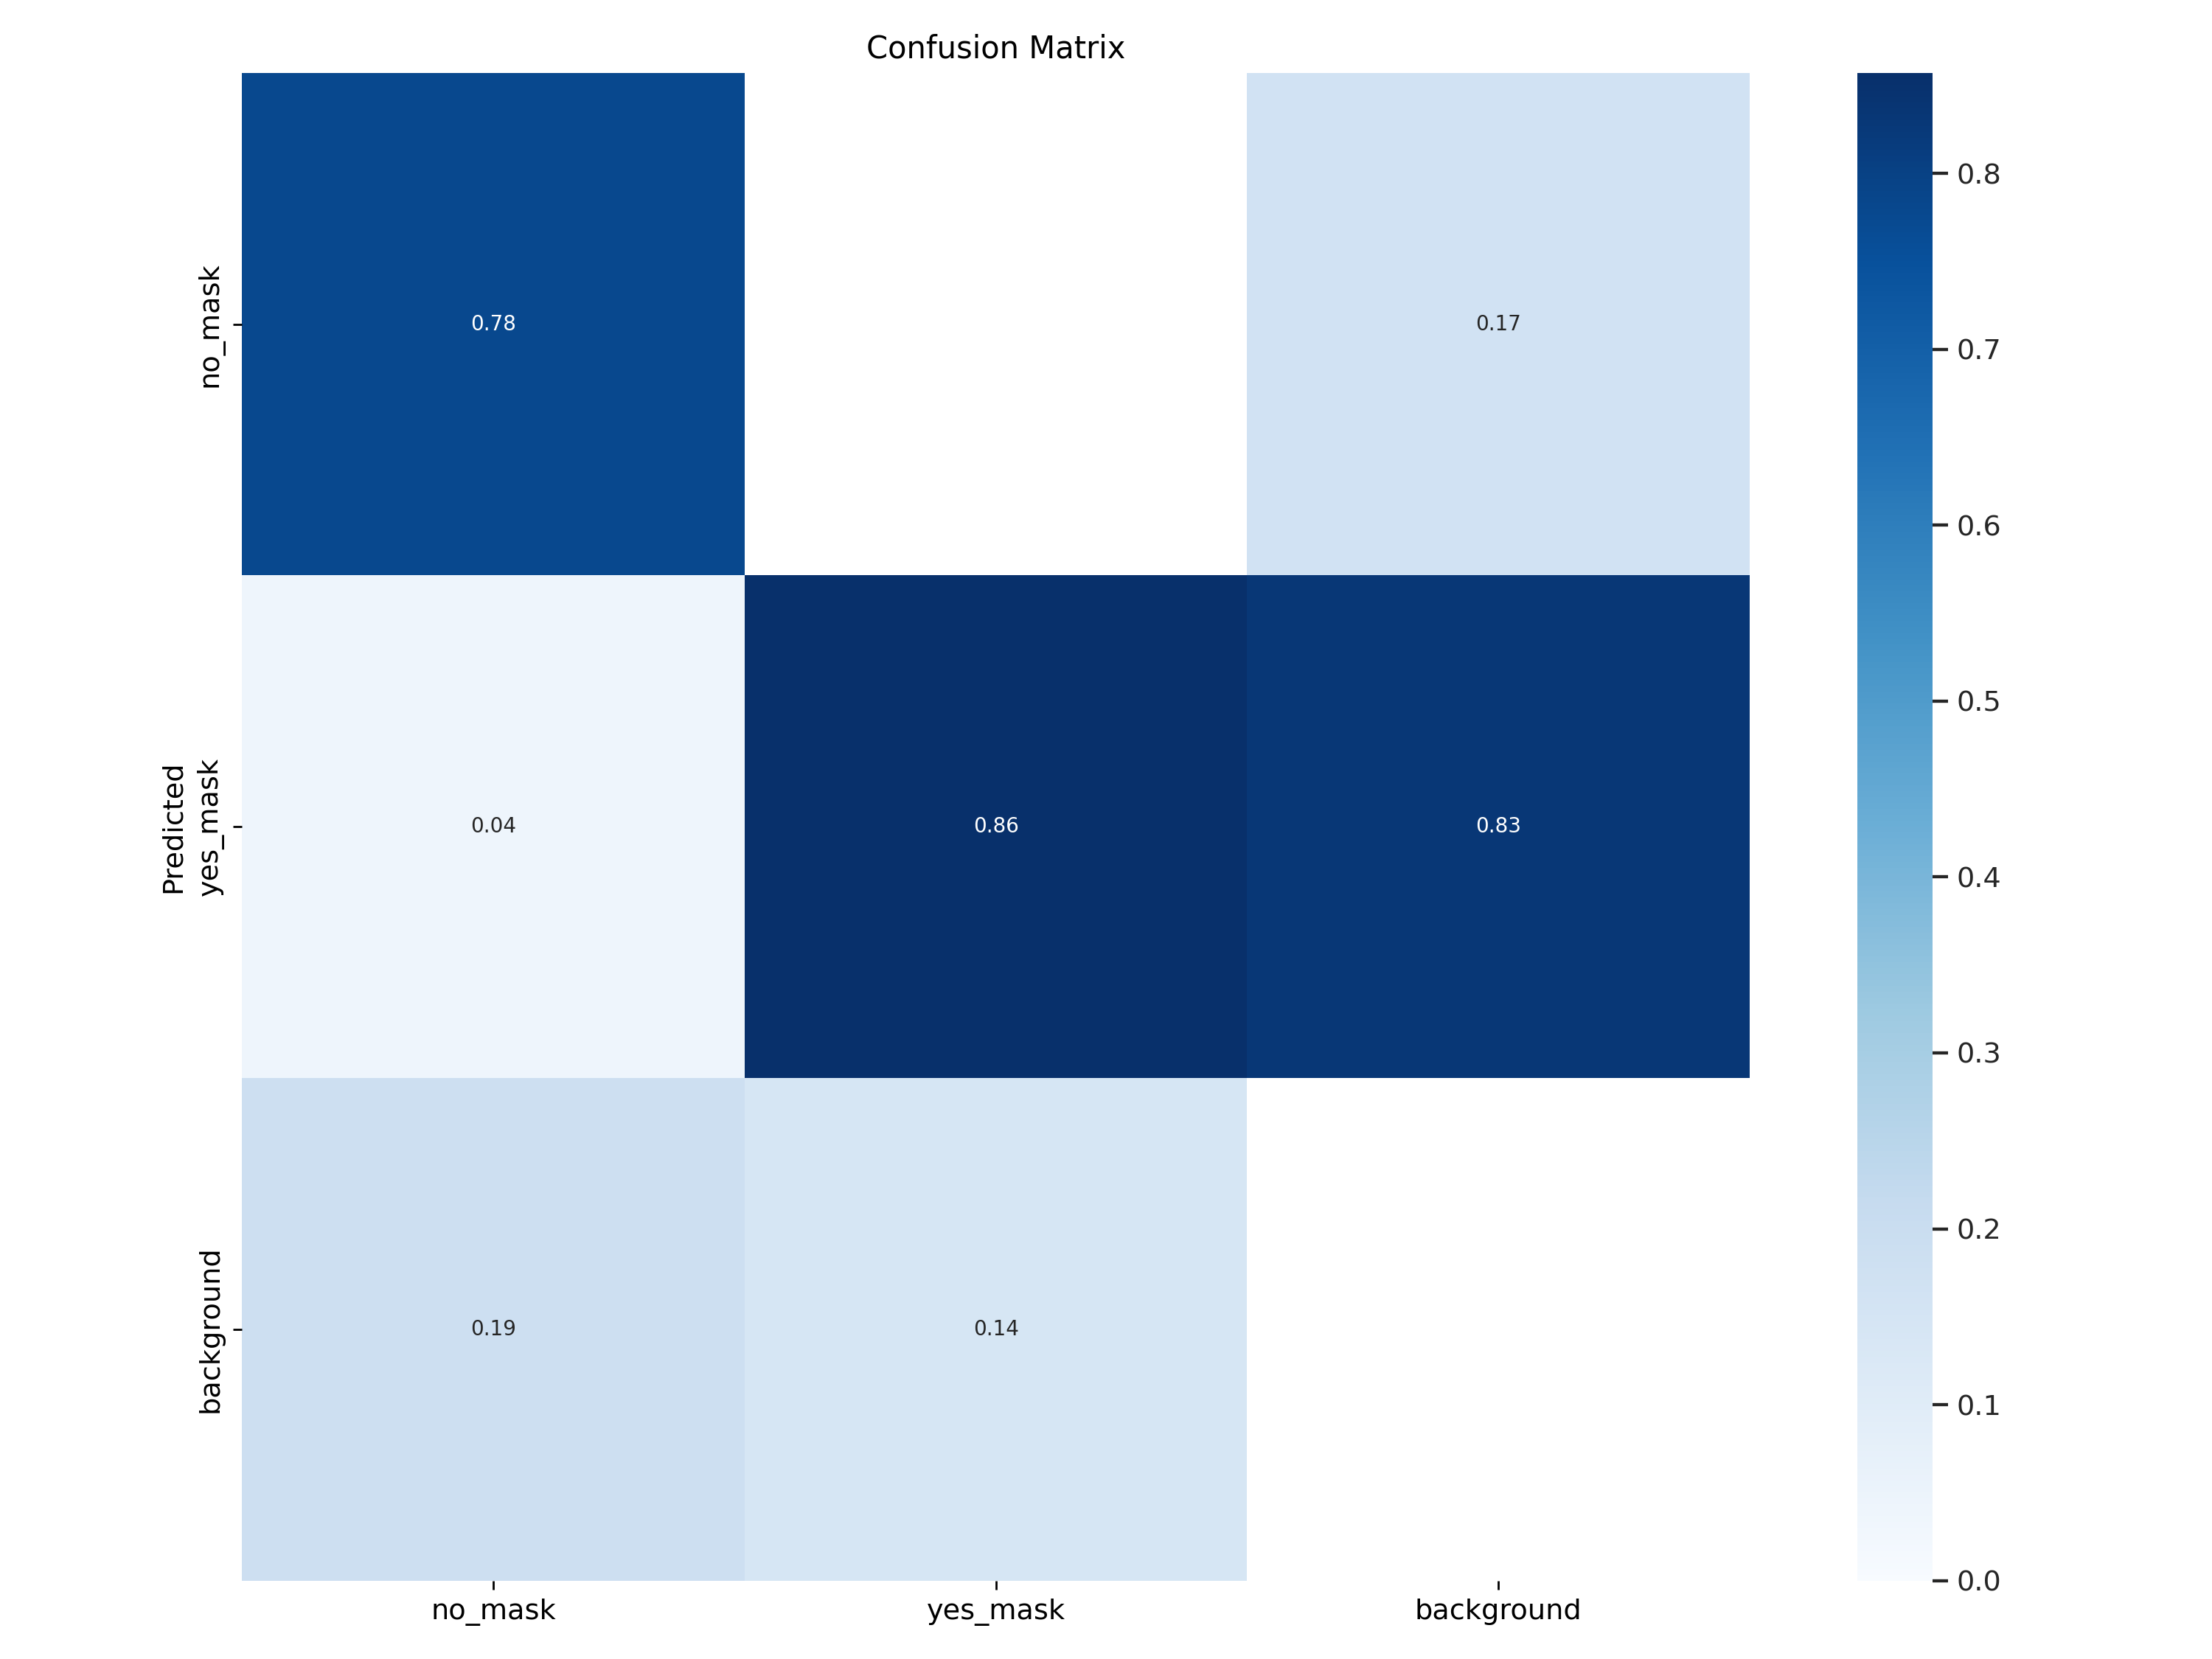

In [19]:
#show the confusion matrix
from IPython.display import Image
Image(filename='yolov5/runs/train/exp2/confusion_matrix.png')

In [34]:
!python yolov5/detect.py --weights yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.7 --source d120_1580791063570.jpg

detect: weights=['yolov5/runs/train/exp/weights/best.pt'], source=d120_1580791063570.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.7.10 torch-1.8.0 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

Fusing layers... 
Model summary: 267 layers, 46113663 parameters, 0 gradients, 107.7 GFLOPs
image 1/1 /home/ma-user/work/d120_1580791063570.jpg: 352x640 23 yes_masks, 10.2ms
Speed: 0.4ms pre-process, 10.2ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp10


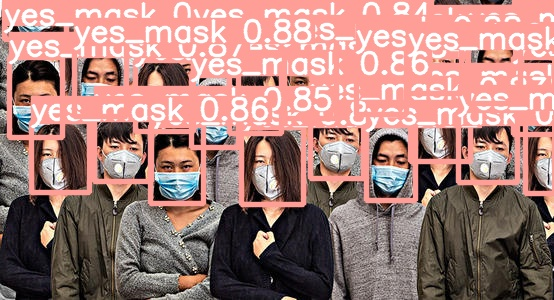

In [35]:
from IPython.display import Image
Image(filename='yolov5/runs/detect/exp10/d120_1580791063570.jpg')

In [32]:
!python yolov5/detect.py --weights yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.7 --source b055_1580797702134.jpg

detect: weights=['yolov5/runs/train/exp/weights/best.pt'], source=b055_1580797702134.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.7.10 torch-1.8.0 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

Fusing layers... 
Model summary: 267 layers, 46113663 parameters, 0 gradients, 107.7 GFLOPs
image 1/1 /home/ma-user/work/b055_1580797702134.jpg: 416x640 7 no_masks, 11.3ms
Speed: 0.4ms pre-process, 11.3ms inference, 2.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp9


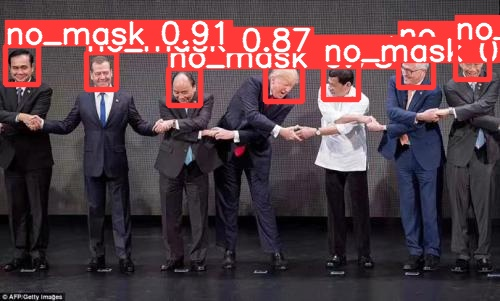

In [33]:
from IPython.display import Image
Image(filename='yolov5/runs/detect/exp9/b055_1580797702134.jpg')